Analysis  of HB data taken from VMD for HB1 CsA 310K Abu6-Mle3

In [2]:
#import relevant libraries
import numpy as np
from numpy import loadtxt
from numpy import load
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.mlab as mlab


## import angle and distance data for hb1 ABU6-MLE3

In [18]:
#data for HB1 for CsA 310K
#data generated from VMD
O_angle = np.loadtxt("hb3_O_angle_csa310.dat")
N_angle = np.loadtxt("hb3_N_angle_csa310.dat")
hb1_dist = np.loadtxt("310_csa_hb3.dat")

In [19]:
#extract relevant column
x1 = O_angle[:,1]
x2 = N_angle[:,1]
time = (O_angle[:,0])*.0005 #convert to micro seconds
hb1_d = hb1_dist[:,1] 


## create dataframe with the angle &dist data to be pulled out easily if condition is met

In [20]:
names = ["time","angle", "dist"] #column names for df
df = pd.DataFrame([time,x1+x2, hb1_d], names).T #create df of all bond lengths and frames

In [21]:
#define parameters
angle1 = 20
dist1 = 3

In [22]:
#angle data count when meets HB criteria
HB = df.ix[(df['angle'] <= angle1)] #pulls out df of rows where the condition is met
HB["angle_cond_met"]  = 0.5
df["angle_cond_met"] = HB["angle_cond_met"] #adds this row into the df

#same again for the distance
dist_cond = df.ix[(df["dist"]<=dist1)] 
dist_cond["dist_cond_met"] = 0.5
df["dist_cond_met"] = dist_cond["dist_cond_met"]

df["HB_occur"] = df["angle_cond_met"] + df["dist_cond_met"] #add the 2 coloumns together , if this =1 then HB occurs
df.fillna(0,inplace = True) #get rid of all NaN values

/home/sarah/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/sarah/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
#get mean and std deviation of dist and angle data, useful for calculating hist in alt way or to plot the normed pdf
mu = np.mean(df["dist"])
sigma = np.std(df["dist"])
mu2 = np.mean(df["angle"])
sigma2 = np.std(df["angle"])
print(mu, "distance mean")
print(sigma, "distance std")
print(mu2, "angle mean")
print(sigma2, "angle std")

(6.051144263982853, 'distance mean')
(1.790480086461512, 'distance std')
(82.92094122570506, 'angle mean')
(36.16806011398243, 'angle std')


## Plot histogram of the distance and angle to check ranges of parameters

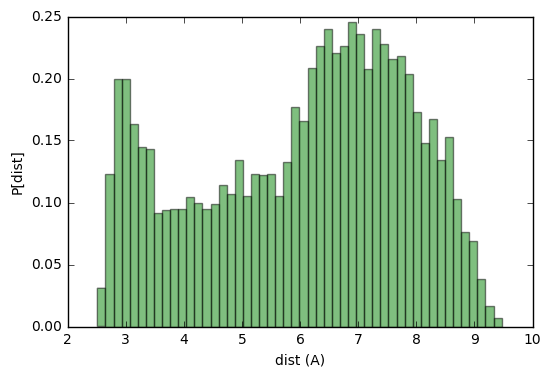

In [24]:
num_bins = 50
fig = plt.figure()

# the histogram of the data
#normed = True, n is the counts normalized to form a probability density - n/len(x) dbin i.e. integral of hist will be 1
n, bins, patches = plt.hist(df["dist"], bins=num_bins, normed = True, facecolor='green', alpha=0.5, histtype="bar")

# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)

#plt.plot(bins, y ,"r")

plt.xlabel('dist (A)')
plt.ylabel('P[dist]')
plt.show()
#fig.savefig('hb1_csa310_dist20_3.png', dpi=100) #use to save out figure if nec

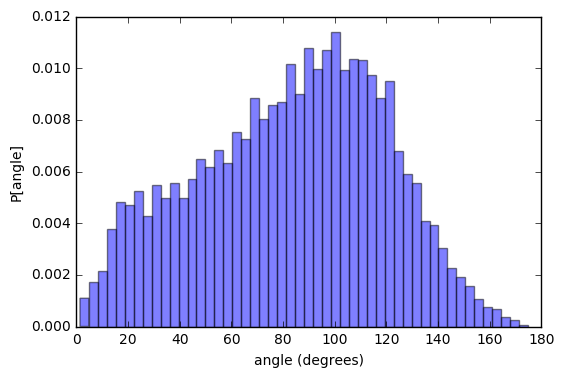

In [25]:
num_bins = 50
fig = plt.figure()

# the histogram of the data
#normed = True, n is the counts normalized to form a probability density - n/len(x) dbin i.e. integral of hist will be 1
n2, bins2, patches2 = plt.hist(df["angle"], bins=num_bins, normed = True, facecolor='blue', alpha=0.5, histtype="bar")

# add a 'best fit' line if want - is a bit general so have commented out for now
#y2 = mlab.normpdf(bins2, mu2, sigma2)
#plt.plot(bins2, y2 ,"r")

plt.xlabel('angle (degrees)')
plt.ylabel('P[angle]')
plt.show()
#fig.savefig('hb1_csa310_ang20_3.png', dpi=100)

## Distance time series with parameter dist coloured red

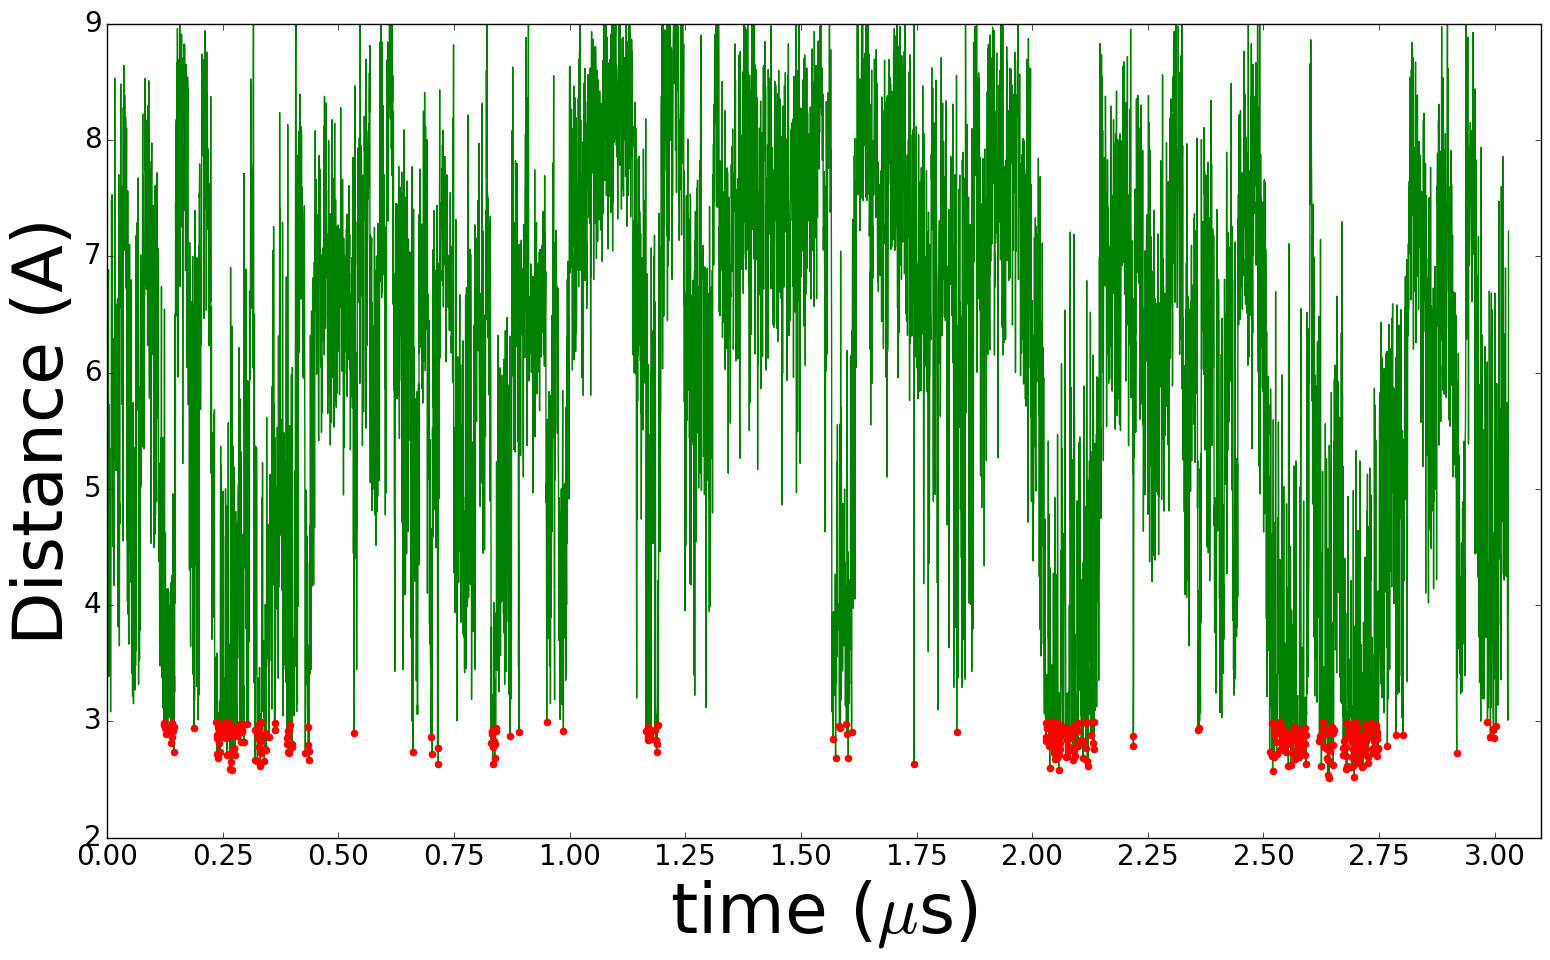

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#afont = {"fontname":"Arial"} #choose font 

#y_spacing=0.5 #choose y axis tick label freq
x_spacing=0.25  #choose x axis tick label freq
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_spacing)) #implement tick label spacing
#ax.yaxis.set_major_locator(ticker.MultipleLocator(y_spacing))

plt.scatter((df["time"][df["dist"]<=dist1]),(df["dist"][df["dist"]<=dist1]), color="red", zorder =10 ) 
ax.plot(time, df["dist"], c= "g")

#plt.yticks([0 , 1])
plt.ylim((2,9))
plt.xlim((0,3.1))
ax.tick_params(labelsize =20)

ax.set_ylabel('Distance (A)', fontsize = 50)
ax.set_xlabel('time ($\mu$s)', fontsize =50)

#plt.grid()
plt.show()
#fig.savefig('hb1_csa310_numhb_ang', dpi=100)


## Angle time series with parameter angle coloured red

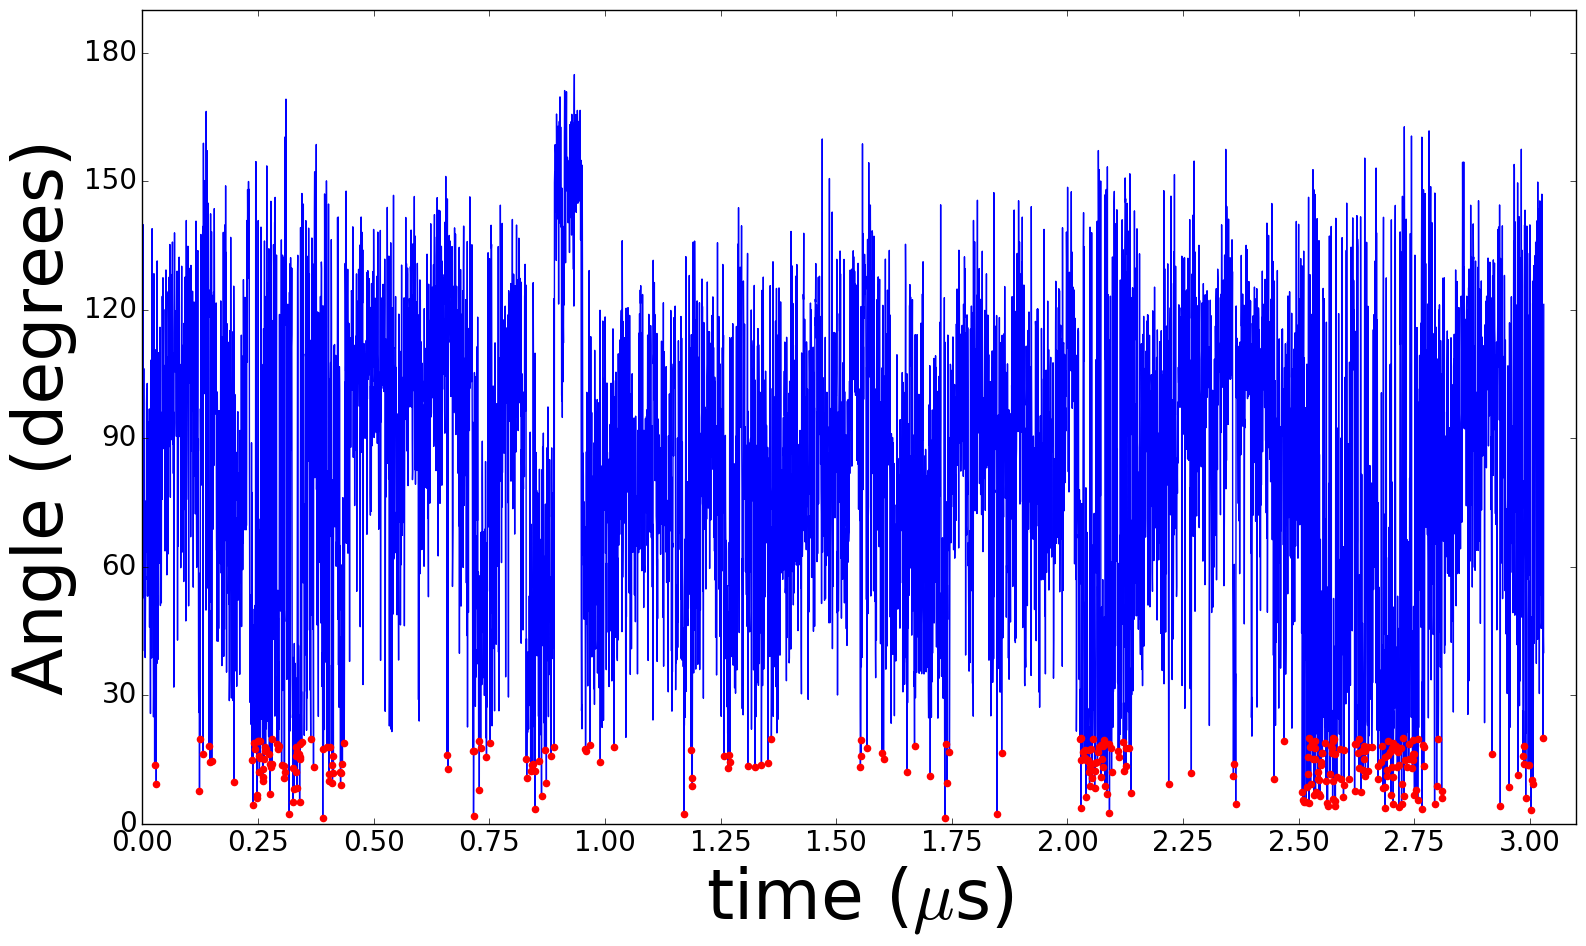

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#afont = {"fontname":"Arial"} #choose font 

y_spacing=30 #choose y axis tick label freq
x_spacing=0.25  #choose x axis tick label freq
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_spacing)) #implement tick label spacing
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_spacing))

plt.scatter((df["time"][df["angle"]<=angle1]),(df["angle"][df["angle"]<=angle1]), color="red", zorder =10 ) 
ax.plot(time, df["angle"], c= "b")

#plt.yticks([0 , 1])
plt.ylim((0,190))
plt.xlim((0,3.1))
ax.tick_params(labelsize =20)

ax.set_ylabel('Angle (degrees)', fontsize = 50)
ax.set_xlabel('time ($\mu$s)', fontsize =50)

#plt.grid()
plt.show()
#fig.savefig('hb1_csa310_numhb_ang', dpi=100)


## HB occurs =1, HB does not occur = 0, based on parameter values chosen

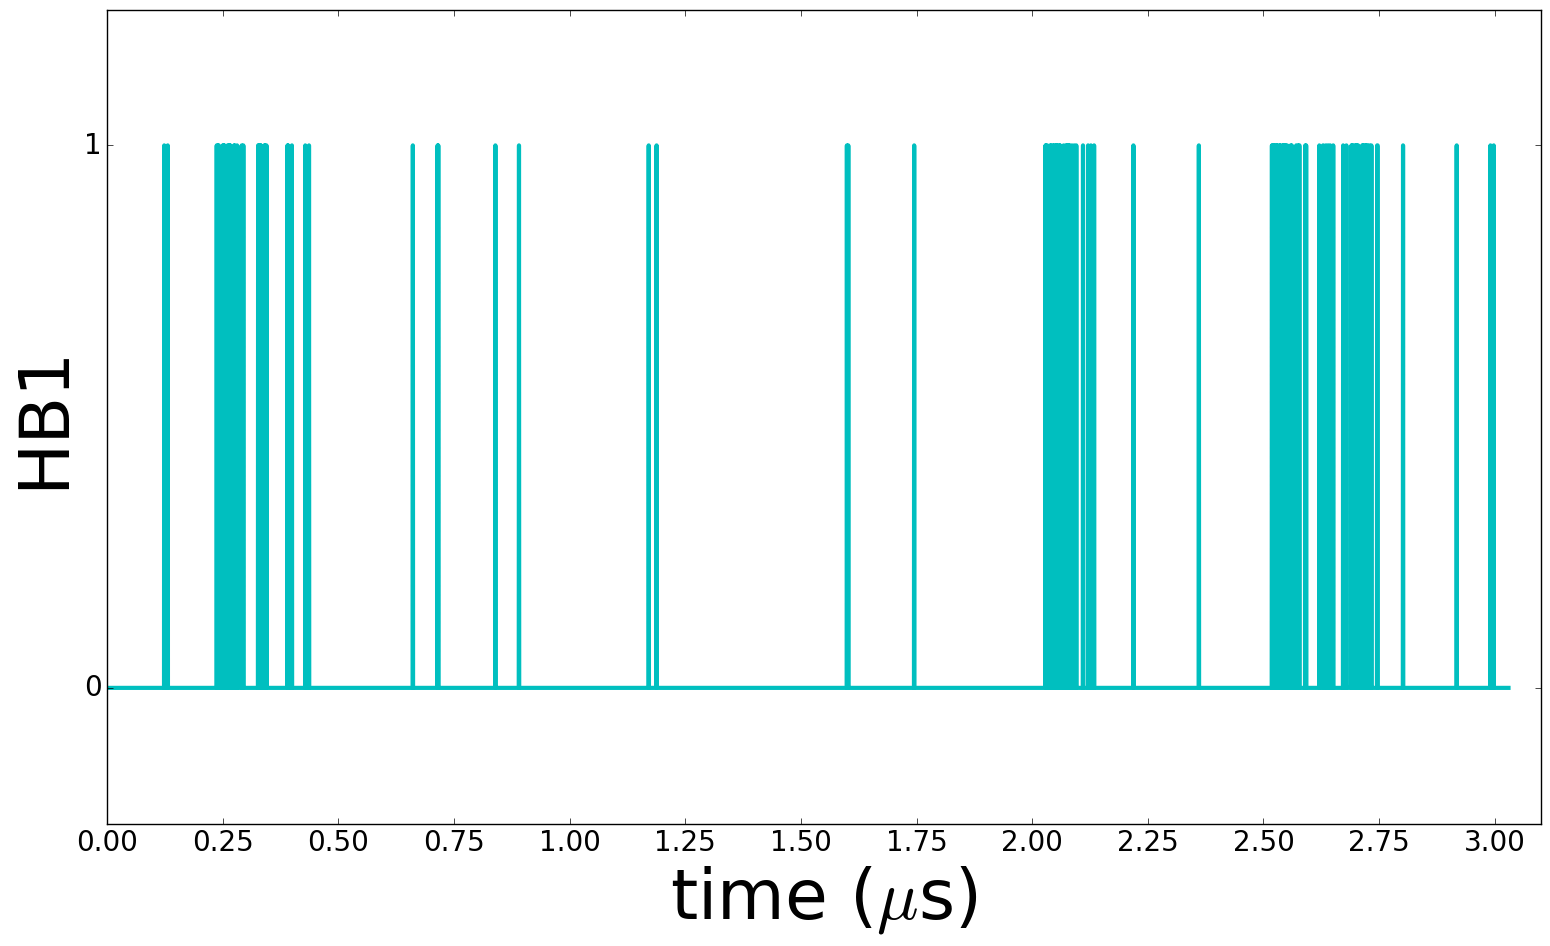

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#afont = {"fontname":"Arial"} #choose font 

y_spacing=1 #choose y axis tick label freq
x_spacing=0.25  #choose x axis tick label freq
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_spacing)) #implement tick label spacing
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_spacing))

ax.plot(time, df["HB_occur"], c= "c", lw=3)

#plt.yticks([0 , 1])
plt.ylim((-0.25,1.25))
plt.xlim((0,3.1))
ax.tick_params(labelsize =20)

ax.set_ylabel('HB1', fontsize = 50)
ax.set_xlabel('time ($\mu$s)', fontsize =50)

#plt.grid()
plt.show()
#fig.savefig('30angle', dpi=100)

In [29]:
HB_list=df["HB_occur"].tolist() #convert pandas series to a list for easy analysis

In [30]:
HB_list.count(1) #counts number of 1s i.e. when HB is on, this is # of times HB formed throughout traj

131

Can check for range of params and compare to see if any big differences - there should not be if data is converged and written out enough.

In [31]:
df.drop(["angle_cond_met", "dist_cond_met"], axis = 1, inplace = True)

In [32]:
df.to_csv("HB3_csa_310.csv")